<a href="https://colab.research.google.com/github/mioyn/AdvDataProg/blob/main/High_School_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset describes a number of properties of over
 50,000 first- and second-year high-school students in the Netherlands from more
 than 2,250 classes from almost 240 schools. The dataset was collected by the
 Central Bureau of Statistics (CBS) Netherlands to support the education of statis
tics at high schools in the Netherlands. The CBSusedaquestionnairetocollect all
 information.




1.   Number—A unique indicator of the student
2.   Gender—The gender of the student
3.   Age—The age of the student in years
4.   Class—The class level (1 or 2) of the student.
5.   Height—The height of the student in centimeters.
6.   Sport—The number of hours per week the student practices sport.
7.   TV—The number of hours per week the student looks TV.
8.   Computer—The number of hours per week the student uses the computer.
9.   Topic—The favorite topic at high school of the student (e.g., mathematics, English, physical training, etc.).
10.  Allowance—The allowance per week for the student.
11.  Work—The amount of money per week earned by the student.
12.  Breakfast—An indicator of whether the student ate breakfast on the day the information was collected.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive


In [ ]:
# Load dataset
df = pd.read_csv("/content/high-school.csv")
df.head()

,Nr,CLASS,GENDER,AGE,HEIGHT,SPORTS,TV,COMPUTER,SUBJECT,ALLOWANCE,WORK,PROVINCE,BREAKFAST
0,0,1,Girl,12,160,1,4,6,Mathematics,5,0,23,Yes
1,1,1,Girl,11,162,3,4,4,Computer Science,3,0,23,Yes
2,2,1,Girl,12,168,1,20,5,Other,25,0,23,Yes
3,3,1,Boy,13,149,0,6,2,Mathematics,10,0,23,Brought something
4,4,1,Girl,12,170,3,30,1,Engineering,5,0,23,Yes


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/datasets/high-school.csv')

In [ ]:
# Inspect data structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50069 entries, 0 to 50068
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Nr         50069 non-null  int64 
 1   CLASS      50069 non-null  int64 
 2   GENDER     50069 non-null  object
 3   AGE        50069 non-null  int64 
 4   HEIGHT     50069 non-null  int64 
 5   SPORTS     50069 non-null  int64 
 6   TV         50069 non-null  int64 
 7   COMPUTER   50069 non-null  int64 
 8   SUBJECT    50069 non-null  object
 9   ALLOWANCE  50069 non-null  int64 
 10  WORK       50069 non-null  int64 
 11  PROVINCE   50069 non-null  int64 
 12  BREAKFAST  50069 non-null  object
dtypes: int64(10), object(3)
memory usage: 5.0+ MB


In [ ]:
df.describe()


,Nr,CLASS,AGE,HEIGHT,SPORTS,TV,COMPUTER,ALLOWANCE,WORK,PROVINCE
count,50069.000000,50069.000000,50069.000000,50069.000000,50069.000000,50069.000000,50069.000000,50069.000000,50069.000000,50069.000000
mean,25034.000000,1.459146,12.674769,163.379436,4.430406,14.229144,6.131658,10.994847,10.394436,26.693064
std,14453.819651,0.498333,0.764724,8.517441,4.645955,10.435791,7.811518,19.797170,30.825596,2.610026
min,0.000000,1.000000,10.000000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,12517.000000,1.000000,12.000000,158.000000,2.000000,7.000000,1.000000,5.000000,0.000000,25.000000
50%,25034.000000,1.000000,13.000000,163.000000,4.000000,12.000000,4.000000,8.000000,0.000000,27.000000
75%,37551.000000,2.000000,13.000000,169.000000,6.000000,20.000000,8.000000,10.000000,10.000000,28.000000
max,50068.000000,2.000000,20.000000,210.000000,70.000000,70.000000,70.000000,500.000000,500.000000,31.000000


In [ ]:
df.isna().sum()

,0
Nr,0
CLASS,0
GENDER,0
AGE,0
HEIGHT,0
SPORTS,0
TV,0
COMPUTER,0
SUBJECT,0
ALLOWANCE,0


In [ ]:
# Categorize Allowance
df['ALLOWANCE_LEVEL'] = pd.cut(df['ALLOWANCE'], bins=[-1, 5, 15, df['ALLOWANCE'].max()],
                               labels=['Low', 'Medium', 'High'])

# Age groups
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[10, 12, 14, 16, 18],
                         labels=['11-12', '13-14', '15-16', '17-18'])

# Total screen time
df['TOTAL_SCREEN_TIME'] = df['TV'] + df['COMPUTER']


In [ ]:
df['ALLOWANCE_LEVEL']

,ALLOWANCE_LEVEL
0,Low
1,Low
2,High
3,Medium
4,Low
...,...
50064,Medium
50065,Low
50066,Medium
50067,Low


In [ ]:
df['AGE_GROUP']

,AGE_GROUP
0,11-12
1,11-12
2,11-12
3,13-14
4,11-12
...,...
50064,11-12
50065,13-14
50066,11-12
50067,13-14


In [ ]:
# Average screen time by age group
avg_screen_time = df.groupby('AGE_GROUP')['TOTAL_SCREEN_TIME'].mean()
print(avg_screen_time)

# Count by allowance level
print(df['ALLOWANCE_LEVEL'].value_counts())

AGE_GROUP
11-12    18.960845
13-14    21.372226
15-16    24.113636
17-18    33.319149
Name: TOTAL_SCREEN_TIME, dtype: float64
ALLOWANCE_LEVEL
Medium    28542
Low       16064
High       5463
Name: count, dtype: int64


<ipython-input-42-443637d6ed52>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_screen_time = df.groupby('AGE_GROUP')['TOTAL_SCREEN_TIME'].mean()


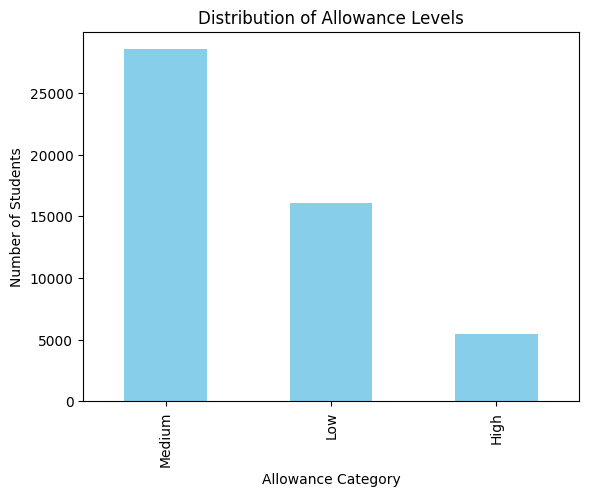

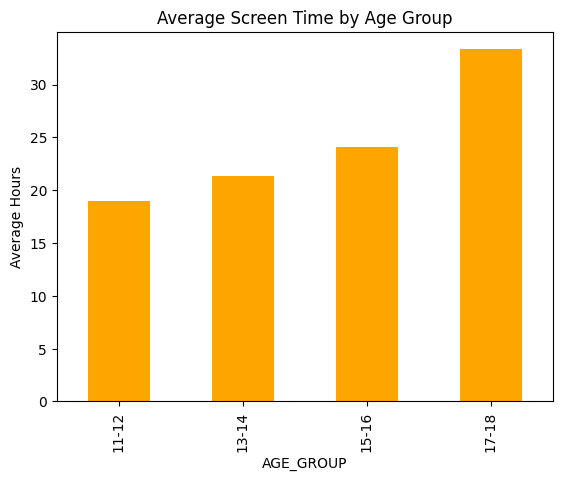

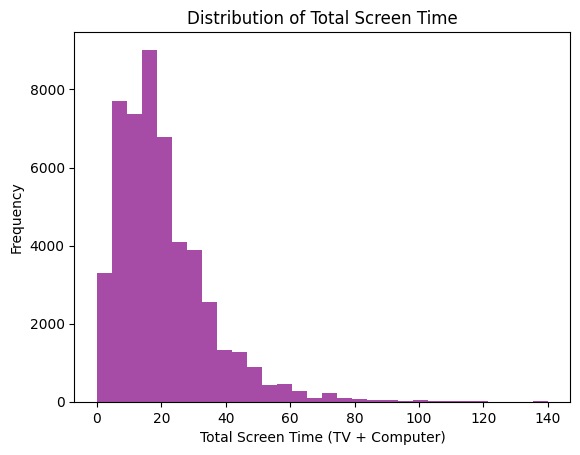

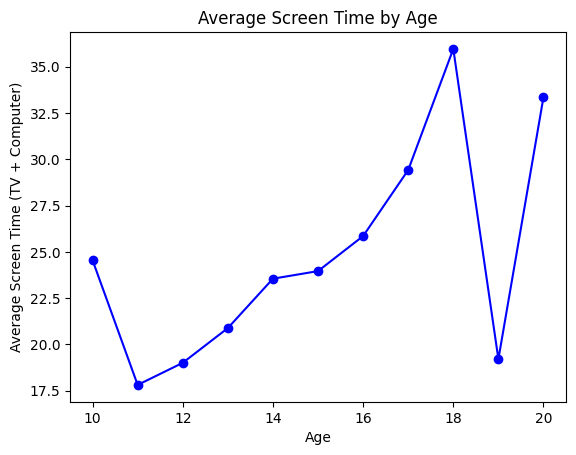

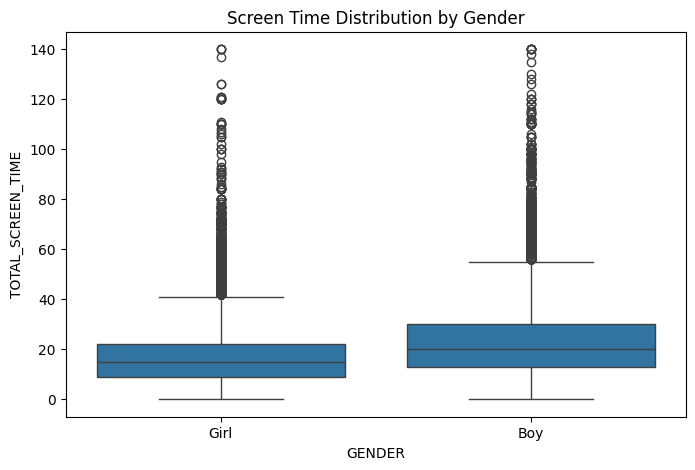

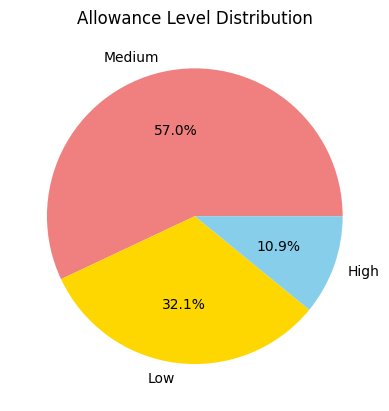

In [ ]:
# Bar chart: Allowance level distribution
df['ALLOWANCE_LEVEL'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Allowance Levels')
plt.xlabel('Allowance Category')
plt.ylabel('Number of Students')
plt.show()

# Bar chart: Average screen time by age group
avg_screen_time.plot(kind='bar', color='orange')
plt.title('Average Screen Time by Age Group')
plt.ylabel('Average Hours')
plt.show()

# Histogram: Distribution of Total Screen Time
df['TOTAL_SCREEN_TIME'].plot(kind='hist', bins=30, color='purple', alpha=0.7)
plt.title('Distribution of Total Screen Time')
plt.xlabel('Total Screen Time (TV + Computer)')
plt.show()

# Line chart: Average screen time by AGE
age_line = df.groupby('AGE')['TOTAL_SCREEN_TIME'].mean()
age_line.plot(kind='line', marker='o', color='blue')
plt.title('Average Screen Time by Age')
plt.xlabel('Age')
plt.ylabel('Average Screen Time (TV + Computer)')
plt.show()


# Box plot: Total Screen Time by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='GENDER', y='TOTAL_SCREEN_TIME')
plt.title('Screen Time Distribution by Gender')
plt.show()


# Pie chart: Allowance levels
df['ALLOWANCE_LEVEL'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'gold', 'skyblue'])
plt.title('Allowance Level Distribution')
plt.ylabel('')  # Hide y-axis label
plt.show()

